In [3]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime
import os

# import tensorflow as tf
# from keras.layers import Dropout
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns


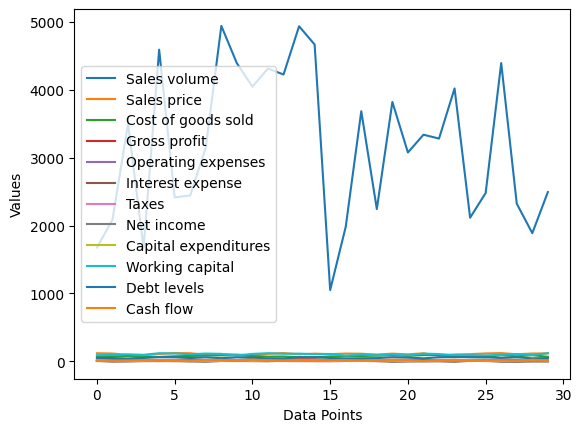

,Sales volume,Sales price,Cost of goods sold,Gross profit,Operating expenses,Interest expense,Taxes,Net income,Capital expenditures,Working capital,Debt levels,Cash flow
0,1675,118,62,10,19,3,6,6,15,89,49,5
1,2087,114,73,18,14,1,3,-6,7,93,47,5
2,3504,92,77,11,11,4,7,-5,5,102,40,9
3,1668,86,62,21,15,2,5,4,8,95,49,18
4,4591,108,64,17,20,5,7,1,13,118,60,11
5,2414,120,73,18,19,1,4,6,12,114,58,5
6,2443,118,78,23,10,2,7,-3,6,104,48,3
7,3152,94,84,10,10,4,4,-9,6,113,57,17
8,4941,103,87,27,14,5,5,3,7,109,46,20
9,4391,99,87,17,16,5,4,3,13,86,57,11


In [5]:
# Define the number of rows
n = 30

# Create a dictionary to store the random data for each variable
data = {
    'Sales volume': [random.randint(1000, 5000) for i in range(n)],
    'Sales price': [random.randint(80, 120) for i in range(n)],
    'Cost of goods sold': [random.randint(60, 90) for i in range(n)],
    'Gross profit': [random.randint(10, 30) for i in range(n)],
    'Operating expenses': [random.randint(10, 20) for i in range(n)],
    'Interest expense': [random.randint(1, 5) for i in range(n)],
    'Taxes': [random.randint(3, 7) for i in range(n)],
    'Net income': [random.randint(-10, 10) for i in range(n)],
    'Capital expenditures': [random.randint(5, 15) for i in range(n)],
    'Working capital': [random.randint(80, 120) for i in range(n)],
    'Debt levels': [random.randint(40, 60) for i in range(n)],
    'Cash flow': [random.randint(0, 25) for i in range(n)]
}

# Create the dataframe from the dictionary
df = pd.DataFrame(data)

# Show the dataframe
# Plot a line plot for each variable
for col in df.columns:
    plt.plot(df[col], label=col)

# Add the legend and labels
plt.legend(loc='best')
plt.xlabel('Data Points')
plt.ylabel('Values')

# Show the plot
plt.show()
df

In [119]:
def unixToStr(unix):
    return datetime.datetime.fromtimestamp(unix).strftime("%d-%m-%y")

def get_working_dates(start_date, end_date):
    # Creamos una lista para almacenar las fechas
    working_dates = []
    # Convertimos las fechas de entrada a objetos datetime
    start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')
#     print(start_date)
#     print(end_date)
    # Recorremos cada día del rango de fechas
    current_date = start_date
    while current_date <= end_date:
        # Si el día es lunes a viernes, lo añadimos a la lista
        if current_date.weekday() < 5:
            working_dates.append(int(current_date.timestamp()))
        # Pasamos al siguiente día
        current_date += datetime.timedelta(days=1)
    # Devolvemos la lista de fechas
    return working_dates


# Prueba de uso del método
START_DATE = "2019-01-01"
END_DATE = "2023-06-30"
working_dates = get_working_dates(START_DATE, END_DATE)
# for working_date in working_dates[:-3]:
#       print()
# print(len(working_dates))
# print(len(working_dates[:-3]))
# Configuración
NUM_TRABAJADORES = 30
HORAS_DIARIAS = 8
TASK_IDS = ["T{:03d}".format(i) for i in range(1, 31)]
PROJECT_IDS = ["P{:03d}".format(i) for i in range(1, 31)]
USER_IDS = ["U{:03d}".format(i) for i in range(1, NUM_TRABAJADORES+1)]
SALARIOS = [15, 20, 25, 30, 40, 50, 100]
MIN_PROJECT_DURATION = 30
projects = []
total_workings_dates = len(working_dates)
projects.append(
  {"projectId": PROJECT_IDS[0], "startDate": working_dates[0], "endDate": working_dates[-1]})
for project_id in PROJECT_IDS[1:]:
    # Seleccionamos una fecha de inicio aleatoria de la lista de días laborables
    start_project = random.choice(working_dates[:-MIN_PROJECT_DURATION])
    start_index = working_dates.index(start_project)
    # print("start_index")
    # print(start_index)
    # Calculamos la fecha de fin
    end_index = random.randint(
        start_index+MIN_PROJECT_DURATION, total_workings_dates-1)
    # print("end_index")
    # print(end_index)
    end_project = working_dates[end_index]

    # print(unixToStr(start_project)+"    "+unixToStr(end_project))
    # print("-----------")
    projects.append(
        {"projectId": project_id, "startDate": start_project, "endDate": end_project})
users = []
for user in USER_IDS:
    random_projects = random.sample(projects, random.randint(1, 6))
    startWorking = random_projects[0]["startDate"]
    endWorking = random_projects[0]["endDate"]
    for project in random_projects:
        if(project["startDate"] < startWorking):
            startWorking = project["startDate"]
        if(project["endDate"] > endWorking):
            endWorking = project["endDate"]
    users.append({
        "userId": user,
        "projects_assigned": random_projects,
        "tasks_assigned": random.sample(TASK_IDS, random.randint(4, 11)),
        "salary_per_hour": random.choice(SALARIOS),
        "startWorking": startWorking,
        "endWorking": endWorking,
    })
# print(json.dumps(users,indent=1))


# Generamos los datos de actividad de cada trabajador
working_days = []

for date in working_dates:
    # Generamos las tareas que realiza el trabajador en ese día
    working_day_data_list = []

    for u in users:
        # Si en la fecha el trabajador no ha empezado a trabajar pasamos al siguiente
        if not(date in range(u["startWorking"], u["endWorking"])):
            continue
        horas_trabajadas = 0
        posibles_projects = u["projects_assigned"].copy()
        while horas_trabajadas < HORAS_DIARIAS:
            # Seleccionamos un proyecto aleatorio entre los disponibles
            if len(posibles_projects) == 0:
                # print("-------------------"+unixToStr(date))
                break
            project = random.choice(posibles_projects)
            # Si la fecha no esta entre las fechas de inicio y fin del proyecto entonces seleccionamos otro proyecto
            if date < project["startDate"] or date > project["endDate"]:
                posibles_projects = [
                    p for p in posibles_projects if p["projectId"] != project["projectId"]]
                continue
            # Seleccionamos una tarea aleatoria entre las disponibles
            task_id = random.choice(u["tasks_assigned"])
            project_id = project["projectId"]

            # Calculamos el tiempo que dedica el trabajador a la tarea
            time_spent = random.randint(1, 8)
            # Verificamos que no se sobrepase la jornada diaria
            if horas_trabajadas + time_spent > HORAS_DIARIAS:
                time_spent = HORAS_DIARIAS - horas_trabajadas
            horas_trabajadas += time_spent
            # Calculamos el coste de la tarea
            task_cost = time_spent * u["salary_per_hour"]
            # Generamos el workingDayId
            working_day_id = "{}{}{}".format(project_id, u["userId"], task_id)
            # Creamos el objeto con los datos de la tarea
            working_day_data = {
                "userId": u["userId"],
                "taskId": working_day_id,
                "timeSpent": time_spent,
                "taskCost": task_cost
            }
            # Añadimos la tarea a la lista de tareas del día
            working_day_data_list.append(working_day_data)
        # Añadimos el día de trabajo al diccionario de días de trabajo
    working_days.append({
        "workingDate": date,
        "workingDayDataList": working_day_data_list
    })
#     print(unixToStr(date))

# df = pd.json_normalize(working_days, 'workingDayDataList', ['workingDate'])
# df 

,userId,taskId,timeSpent,taskCost,workingDate
0,U009,P001U009T025,5,75,1546297200
1,U009,P001U009T005,3,45,1546297200
2,U009,P001U009T002,6,90,1546383600
3,U009,P001U009T002,2,30,1546383600
4,U009,P001U009T028,7,105,1546470000
...,...,...,...,...,...
48814,U009,P001U009T028,2,30,1687816800
48815,U009,P001U009T005,2,30,1687903200
48816,U009,P001U009T025,2,30,1687903200
48817,U009,P001U009T029,4,60,1687903200


In [10]:
# ruta_script = os.path.dirname(os.path.abspath(__file__))
# ruta_archivo = os.path.join(ruta_script, "datos.json")
df = pd.read_json("datos.json")
working_days = df.to_dict(orient='records')
df = pd.json_normalize(working_days, 'workingDayDataList', ['workingDate'])
df


,userId,taskId,timeSpent,taskCost,workingDate
0,U006,P001U006T023,5,200,1546297200
1,U006,P001U006T028,2,80,1546297200
2,U006,P001U006T028,1,40,1546297200
3,U030,P001U030T001,1,25,1546297200
4,U030,P001U030T016,7,175,1546297200
...,...,...,...,...,...
37611,U006,P001U006T028,7,280,1687989600
37612,U006,P001U006T001,1,40,1687989600
37613,U030,P001U030T010,4,100,1687989600
37614,U030,P001U030T017,2,50,1687989600


## Dataframe creation (Data Analysis)


In [20]:
df['project'] = df['taskId'].str.extract(r'(P\d+)')[0]
df['user'] = df['taskId'].str.extract(r'(U\d+)')[0]
df['task'] = df['taskId'].str.extract(r'(T\d+)')[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37616 entries, 0 to 37615
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userId       37616 non-null  object
 1   taskId       37616 non-null  object
 2   timeSpent    37616 non-null  int64 
 3   taskCost     37616 non-null  int64 
 4   workingDate  37616 non-null  object
 5   project      37616 non-null  object
 6   user         37616 non-null  object
 7   task         37616 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [17]:

grouped_df = df.groupby(['project']).agg({
        'timeSpent': ['sum', 'mean'],
        'taskCost': ['sum', 'mean']}
)

num_workers = df.groupby(['project'])['user'].nunique()
workers = df.groupby(['project'])['user'].unique()

project_result_df = pd.concat([grouped_df, num_workers, workers], axis=1)
project_result_df.columns = ['Total Time Spent', 'Mean Time Spent', 'Total Cost', 'Mean Cost', 'Number of Workers', 'Workers']
project_result_df

,Total Time Spent,Mean Time Spent,Total Cost,Mean Cost,Number of Workers,Workers
project,,,,,,
P001,14875,3.489327,489820,114.900305,2,['U006' 'U030']
P002,2411,3.459110,119075,170.839311,3,['U009' 'U021' 'U025']
P003,1831,3.691532,54930,110.745968,2,['U002' 'U011']
P004,1002,3.540636,32560,115.053004,3,['U004' 'U020' 'U022']
P005,3238,3.419219,58550,61.826822,2,['U013' 'U030']
P006,8779,3.545638,225960,91.260097,4,['U003' 'U006' 'U014' 'U029']
P007,920,3.538462,53040,204.000000,3,['U002' 'U026' 'U027']
P008,2473,3.594477,101500,147.529070,3,['U023' 'U025' 'U026']
P009,2106,3.492537,49625,82.296849,3,['U003' 'U009' 'U021']


Text(0.5, 1.0, 'Mean Cost Spent')

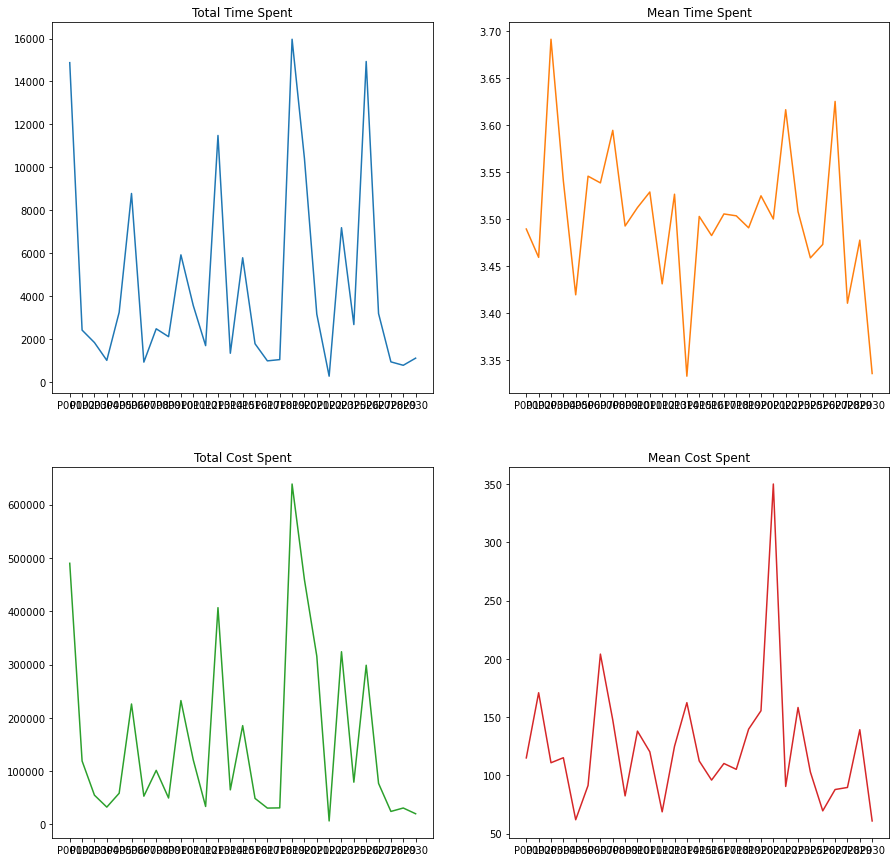

In [21]:
fig, axs = plt.subplots(2, 2,  figsize=(15, 15))
axs[0, 0].plot(project_result_df.index, project_result_df['Total Time Spent'])
axs[0, 0].set_title('Total Time Spent')
axs[0, 1].plot(project_result_df.index, project_result_df['Mean Time Spent'], 'tab:orange')
axs[0, 1].set_title('Mean Time Spent')
axs[1, 0].plot(project_result_df.index, project_result_df['Total Cost'], 'tab:green')
axs[1, 0].set_title('Total Cost Spent')
axs[1, 1].plot(project_result_df.index, project_result_df['Mean Cost'], 'tab:red')
axs[1, 1].set_title('Mean Cost Spent')



In [27]:
grouped_df = df.groupby(['project', 'user']).agg({
        'timeSpent': ['sum', 'mean'],
        'taskCost': ['sum', 'mean']}
)

aux_df = df.groupby(['project','user']).agg({'workingDate': ['min', 'max']})
aux_df['workingDate'] = aux_df['workingDate'].applymap(lambda x: datetime.datetime.fromtimestamp(x).strftime("%d-%m-%Y"))

user_result_df = pd.concat([grouped_df, aux_df], axis=1)
user_result_df.columns = ['Total Time Spent', 'Mean Time Spent', 'Total Cost', 'Mean Cost', 'Working start', 'Working end']
user_result_df

Total Time Spent  Mean Time Spent  Total Cost   Mean Cost  \
project user                                                              
P001    U006              7863         3.442644      314520  137.705779   
        U030              7012         3.543204      175300   88.580091   
P002    U009              1007         3.496528       25175   87.413194   
        U021               775         3.725962       31000  149.038462   
        U025               629         3.129353       62900  312.935323   
...                        ...              ...         ...         ...   
P029    U017               592         3.421965       23680  136.878613   
        U021               180         3.673469        7200  146.938776   
P030    U008               260         3.661972        3900   54.929577   
        U014               488         3.189542        7320   47.843137   
        U018               356         3.327103        8900   83.177570   

             Working start Working end  
project user                            
P001    U006    01-01-2019  29-06-2023  
        U030    01-01-2019  29-06-2023  
P002    U009    31-08-2022  01-05-2023  
        U021    31-08-2022  01-05-2023  
        U025    31-08-2022  28-04-2023  
...                    ...         ...  
P029    U017    16-11-2022  27-02-2023  
        U021    17-11-2022  28-02-2023  
P030    U008    14-02-2023  10-05-2023  
        U014    14-02-2023  09-05-2023  
        U018    14-02-2023  09-05-2023  

[80 rows x 6 columns]

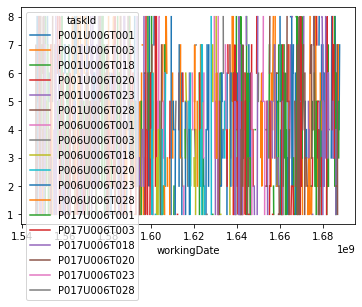

In [23]:
# Extract rows for user U006
df_user = df[df['userId'] == 'U006']

# Aggregate duplicates by summing timeSpent values
df_user = df_user.groupby(['workingDate', 'taskId']).sum()

# Reset index
df_user = df_user.reset_index()

# Set workingDate as index
df_user = df_user.set_index('workingDate')

# Pivot data so that each task becomes a column
pivot_df = df_user.pivot(columns='taskId', values='timeSpent')

# Plot pivot data
pivot_df.plot(kind='line')

# Show plot
plt.show()

                   taskId  timeSpent  taskCost
workingDate                                   
1546383600   P001U006T001          1        40
1546815600   P001U006T001          5       200
1546902000   P001U006T001          8       320
1547161200   P001U006T001          1        40
1547420400   P001U006T001          8       320
...                   ...        ...       ...
1686520800   P001U006T001          2        80
1687212000   P001U006T001          8       320
1687471200   P001U006T001          4       160
1687730400   P001U006T001          7       280
1687989600   P001U006T001          1        40

[340 rows x 3 columns]


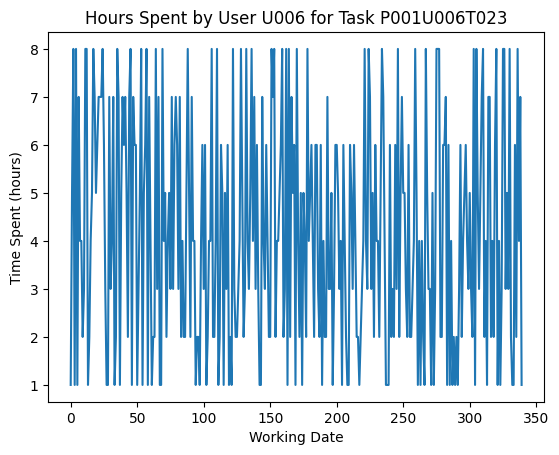

In [104]:
# df_user = df[df['userId'] == 'U006']
df_user = df_user[df_user['taskId'] == 'P001U006T001']
print(df_user)

# for task in df_user.columns:
plt.plot(np.arange(len(df_user['timeSpent'])), df_user['timeSpent'])
plt.xlabel('Working Date')
plt.ylabel('Time Spent (hours)')
plt.title('Hours Spent by User U006 for Task P001U006T023')
plt.show()


## Time series prediction (LSTM)


In [156]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [65]:
train = np.array(df_user['timeSpent'][0:int(len(train)*0.9)])
test = np.array(df_user['timeSpent'][int(len(train)*0.9)+1:len(train)])


C:\Users\miguel.azcarate\AppData\Local\Temp\ipykernel_8708\893981350.py:1: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\miguel.azcarate\AppData\Local\Temp\ipykernel_8708\893981350.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [84]:
n_steps = 2
X_train, y_train = split_sequence(train, n_steps)
X_test, y_test = split_sequence(test, n_steps)


In [85]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

# history = model.fit(
#     X_train,
#     y_train,
#     epochs=100,
#     verbose=0,
#     validation_data=(X_test, y_test),
# #     callbacks= [callbacks]
# )

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks= [callbacks]
)

print(history.history.keys())

Epoch 1/50
8/8 [==============================] - 2s 35ms/step - loss: 24.0460 - val_loss: 21.2588
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 23.2094 - val_loss: 20.3823
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 22.0832 - val_loss: 19.1133
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 20.3754 - val_loss: 17.0739
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 17.4965 - val_loss: 13.9062
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 13.5520 - val_loss: 11.2958
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 12.3776 - val_loss: 11.9955
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 12.0296 - val_loss: 10.6589
Epoch 9/50
8/8 [==============================] - 0s 7ms/step - loss: 11.3770 - val_loss: 10.3061
Epoch 10/50
8/8 [==============================] - 0s 7ms/step - loss: 10.8977 - val_loss: 9.9716
Epoch 11/50
8/8 [==

In [87]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test, verbose = 0)

# Calcuate metrics
score_mae = mean_absolute_error(y_test, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(score_mae)
print(score_rmse)

2.1383725187995215
2.397967860257375


In [ ]:
import plotly.express as px

df_plot = pd.DataFrame(data={'Test': y_test, 'Base Model Predictions': y_pred.squeeze()})

# print(pd.Series(y_control))
fig = px.line(df_plot)
fig.show()

## Neural Network Prediction


In [45]:
import numpy as np
import pandas as pd
import random

# Number of rows (employee days)
n = 10000

# Number of unique employees
m = 50

# Number of unique projects
p = 15

# Generate random employee IDs
employee_ids = np.random.choice(['E' + str(i) for i in range(1, m + 1)], n)

# Generate random days
days = [f"{year}-{month:02d}-{day:02d}" for year, month, day in zip(np.random.choice(range(2020, 2023), n), np.random.choice(range(1, 13), n), np.random.choice(range(1, 29), n))]

# Generate random skill levels (1-5) for each employee
skill_levels = {}
for i in range(1, m + 1):
    skill_levels['E' + str(i)] = np.random.choice(range(1, 6))

# Generate random workloads (0-10)
workload = np.random.choice(range(0, 11), n)

# Generate random motivation levels (0-10)
motivation = np.random.choice(range(0, 11), n)

# Generate random predicted hours (0-8)
predicted_hours = np.random.choice(range(0, 9), n)

# Generate random project types (1-5)
project_types = np.random.choice(range(1, 6), n)

# Generate random prior experience levels (0-5) for each employee
prior_experience = {}
for i in range(1, m + 1):
    prior_experience['E' + str(i)] = np.random.choice(range(0, 6))

# Generate random project deadlines (1-5)
project_deadlines = np.random.choice(range(1, 6), n)

# Generate random collaboration levels (0-5)
collaboration = np.random.choice(range(0, 6), n)

# Generate random task complexities (1-5)
task_complexities = np.random.choice(range(1, 6), n)

# Generate random remote work levels (0 or 1)
remote_work = np.random.choice([0, 1], n)

# Create the dataframe
data = {'Employee': employee_ids,
        'Day': days,
        'Skill level': [skill_levels[id] for id in employee_ids],
        'Workload': workload,
        'Motivation': motivation,
        'Predicted Hours': predicted_hours,
        'Project type': project_types,
        'Prior experience': [prior_experience[id] for id in employee_ids],
        'Project deadline': project_deadlines,
        'Collaboration with others': collaboration,
        'Task complexity': task_complexities,
        'Remote work': remote_work}
df = pd.DataFrame(data)
df

,Employee,Day,Skill level,Workload,Motivation,Predicted Hours,Project type,Prior experience,Project deadline,Collaboration with others,Task complexity,Remote work
0,E23,2020-09-15,2,1,10,6,1,1,2,5,4,1
1,E35,2022-07-08,3,3,3,6,3,3,1,3,1,0
2,E28,2020-03-19,5,8,3,2,4,4,2,2,3,0
3,E29,2022-06-05,3,10,9,4,2,1,2,3,2,0
4,E20,2020-12-22,3,4,2,8,1,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,E40,2020-01-19,3,4,4,7,5,1,2,0,1,0
9996,E42,2021-08-02,4,10,3,4,4,3,2,0,2,1
9997,E47,2021-02-02,3,4,4,2,4,5,1,3,5,1
9998,E2,2022-04-16,3,8,8,3,2,1,3,4,2,1


In [46]:
###### Data Analysis ######
df.head()

,Employee,Day,Skill level,Workload,Motivation,Predicted Hours,Project type,Prior experience,Project deadline,Collaboration with others,Task complexity,Remote work
0,E23,2020-09-15,2,1,10,6,1,1,2,5,4,1
1,E35,2022-07-08,3,3,3,6,3,3,1,3,1,0
2,E28,2020-03-19,5,8,3,2,4,4,2,2,3,0
3,E29,2022-06-05,3,10,9,4,2,1,2,3,2,0
4,E20,2020-12-22,3,4,2,8,1,1,5,1,2,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee                   10000 non-null  object
 1   Day                        10000 non-null  object
 2   Skill level                10000 non-null  int32 
 3   Workload                   10000 non-null  int32 
 4   Motivation                 10000 non-null  int32 
 5   Predicted Hours            10000 non-null  int32 
 6   Project type               10000 non-null  int32 
 7   Prior experience           10000 non-null  int32 
 8   Project deadline           10000 non-null  int32 
 9   Collaboration with others  10000 non-null  int32 
 10  Task complexity            10000 non-null  int32 
 11  Remote work                10000 non-null  int32 
dtypes: int32(10), object(2)
memory usage: 547.0+ KB


In [47]:
df.describe()

,Skill level,Workload,Motivation,Predicted Hours,Project type,Prior experience,Project deadline,Collaboration with others,Task complexity,Remote work
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.329300,5.058700,5.019000,4.029600,2.998900,2.751100,2.995200,2.465700,3.000600,0.504000
std,1.277899,3.155099,3.160734,2.554912,1.413258,1.732931,1.410523,1.702972,1.420353,0.500009
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,3.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000
75%,4.000000,8.000000,8.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,5.000000,10.000000,10.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


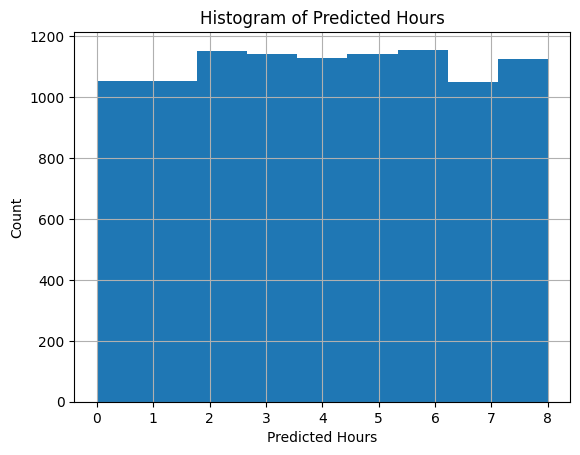

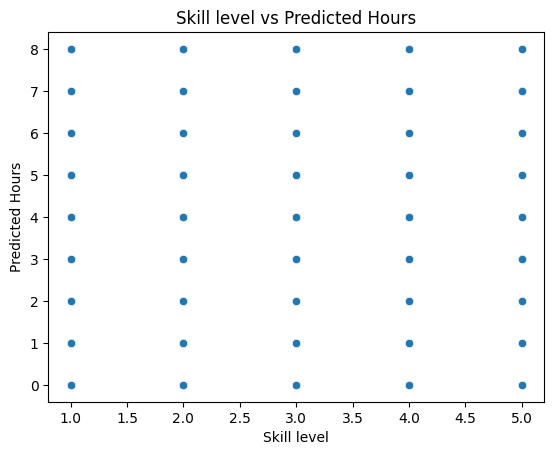

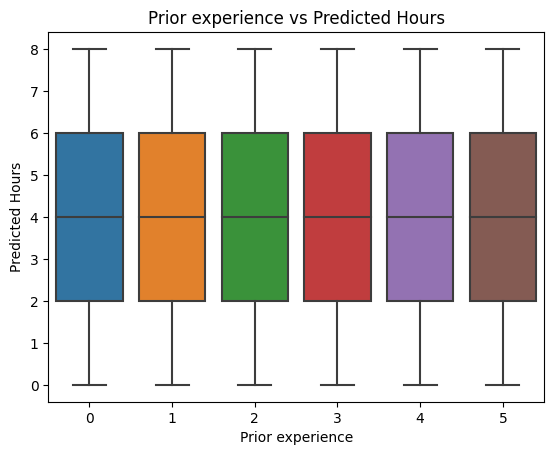

In [65]:
# Plot a histogram of the predicted hours
df['Predicted Hours'].hist(bins=9)
plt.xlabel('Predicted Hours')
plt.ylabel('Count')
plt.title('Histogram of Predicted Hours')
plt.show()

# Plot a scatter plot of skill level vs predicted hours
sns.scatterplot(x='Skill level', y='Predicted Hours', data=df)
plt.xlabel('Skill level')
plt.ylabel('Predicted Hours')
plt.title('Skill level vs Predicted Hours')
plt.show()

# Plot a box plot of prior experience vs predicted hours
sns.boxplot(x='Prior experience', y='Predicted Hours', data=df)
plt.xlabel('Prior experience')
plt.ylabel('Predicted Hours')
plt.title('Prior experience vs Predicted Hours')
plt.show()


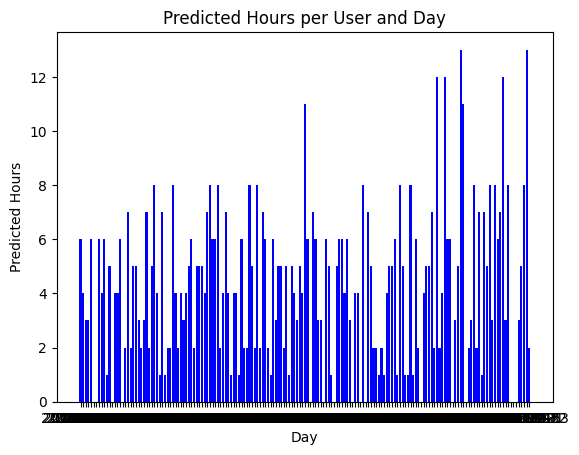

In [77]:
employee = "E23"

grouped_df = df[df["Employee"]==employee].groupby(['Day'])['Predicted Hours'].sum().reset_index()

fig, ax = plt.subplots()
ax.bar(grouped_df['Day'], grouped_df['Predicted Hours'], color='blue')
ax.set_xlabel('Day')
ax.set_ylabel('Predicted Hours')
ax.set_title('Predicted Hours per User and Day')

for i, v in enumerate(grouped_df['Predicted Hours']):
    ax.plot(v, color='blue')

plt.show()


In [29]:
###### Train NN ######

# Extract the features and target variables
features = df.drop(['Predicted Hours', 'Employee', 'Day'], axis=1)
target = df['Predicted Hours']

# UserID One-hot encoding
user_id = df['Employee']
user_id = pd.get_dummies(user_id)
features = np.concatenate((features, user_id), axis=1)

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Scale the features data
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Build the neural network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=features.shape[1]))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(features_train, target_train, epochs=100, batch_size=32, validation_data=(features_test, target_test))

# Evaluate the model
test_loss, test_mae = model.evaluate(features_test, target_test)
print('Test Loss:', test_loss)
print('Test Mean Absolute Error:', test_mae)


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 7.2394 - mean_absolute_error: 2.3029 - val_loss: 6.6820 - val_mean_absolute_error: 2.2398
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 6.7482 - mean_absolute_error: 2.2441 - val_loss: 6.7621 - val_mean_absolute_error: 2.2439
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 6.6732 - mean_absolute_error: 2.2284 - val_loss: 6.7327 - val_mean_absolute_error: 2.2486
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 6.6610 - mean_absolute_error: 2.2280 - val_loss: 6.6336 - val_mean_absolute_error: 2.2318
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 6.6244 - mean_absolute_error: 2.2226 - val_loss: 6.8256 - val_mean_absolute_error: 2.2496
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 6.5799 - mean_absolute_error: 2.2170 - val_loss: 6.6930 - val_mean_absolute_error: 2.2439
Epoch 7/10

250/250 [==============================] - 0s 1ms/step - loss: 2.5931 - mean_absolute_error: 1.2802 - val_loss: 10.2379 - val_mean_absolute_error: 2.6414
Epoch 51/100
250/250 [==============================] - 0s 1ms/step - loss: 2.5198 - mean_absolute_error: 1.2617 - val_loss: 10.1675 - val_mean_absolute_error: 2.6203
Epoch 52/100
250/250 [==============================] - 0s 1ms/step - loss: 2.4328 - mean_absolute_error: 1.2366 - val_loss: 10.4178 - val_mean_absolute_error: 2.6630
Epoch 53/100
250/250 [==============================] - 0s 1ms/step - loss: 2.3916 - mean_absolute_error: 1.2276 - val_loss: 10.4776 - val_mean_absolute_error: 2.6639
Epoch 54/100
250/250 [==============================] - 0s 1ms/step - loss: 2.2903 - mean_absolute_error: 1.1987 - val_loss: 10.7718 - val_mean_absolute_error: 2.6785
Epoch 55/100
250/250 [==============================] - 0s 1ms/step - loss: 2.2888 - mean_absolute_error: 1.1987 - val_loss: 10.5752 - val_mean_absolute_error: 2.6706
Epoch 56/10

250/250 [==============================] - 0s 1ms/step - loss: 0.8999 - mean_absolute_error: 0.7396 - val_loss: 12.8090 - val_mean_absolute_error: 2.8855
Epoch 100/100
63/63 [==============================] - 0s 925us/step - loss: 12.8069 - mean_absolute_error: 2.8905
Test Loss: 12.80688762664795
Test Mean Absolute Error: 2.890488624572754


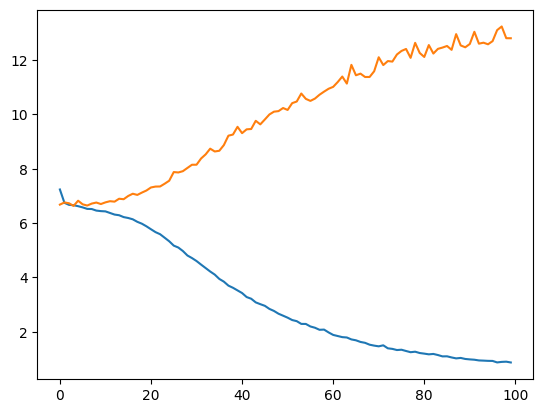

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])